## Phone Price Classification

This project will focus on the variables that effect mobile phone prices, specifically what features of the phone and capabilities push pricing. I will be running the csv file from my local device but the dataset was retrieved from https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download. 

battery_power = Total energy a battery can store in one time measured in mAh
blue = Has bluetooth or not
clock_speed = speed at which microprocessor executes instructions
dual_sim = Has dual sim support or not
fc = Front Camera mega pixels
four_g = Has 4G or not
int_memory = Internal Memory in Gigabytes
m_dep = Mobile Depth in cm
mobile_wt = Weight of mobile phone
n_cores = Number of cores of processor
pc = Primary Camera mega pixels
px_height = Pixel Resolution Height
px_width = Pixel Resolution Width
ram = Random Access Memory in Mega Bytes
sc_h = Screen Height of mobile in cm
sc_w = Screen Width of mobile in cm
talk_time = longest time that a single battery charge will last when you are
three_g = Has 3G or not
touch_screen = Has touch screen or not
wifi = Has wifi or not
price_range = This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Project Analysis

In [1]:
#first I will import any libraries I believe will be utilized during the analysis
%pip install seaborn
%pip install nbformat
%pip install plotly
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# create a pandas dataframe retriving the dataset from its filepath
def load_and_preview_csv(file_path):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Print the first 5 rows
        print(df.head())
        
        return df
    except Exception as e:
        print(f"Error reading the CSV file: {e}")

# Example usage (Replace 'your_file.csv' with your actual file path)
df = load_and_preview_csv("DATA.csv")

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [19]:
# Next we want to gather information about the dataset so we can properly clean and prepare the data for testing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [20]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [21]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### Normaly the next step would be to replace null or missing values with the mean value for continuous data points and with the most frequent for categorical data points. However this data is in excelent condition so we will move on to Visualization.

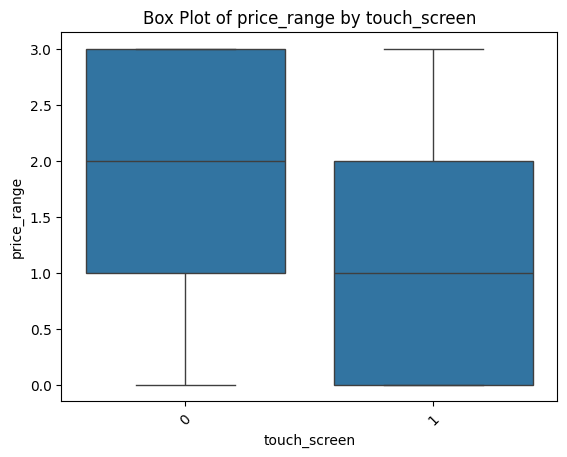

In [33]:
# using Boxplots we can see various features and wether or not they have to many outliers to be considered useful data.
def create_box_plot(df, source, target):
    try:
        #plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[source], y=df[target])
        plt.title(f'Box Plot of {target} by {source}')
        plt.xticks(rotation=45)
        plt.show()
    except Exception as e:
        print(f"Error creating the box plot: {e}")

# Example usage 
create_box_plot(df, 'touch_screen', 'price_range')
#I believe the simplification of price into value standins rather than numerical values negatively affects the effectiveness of the boxplot format.

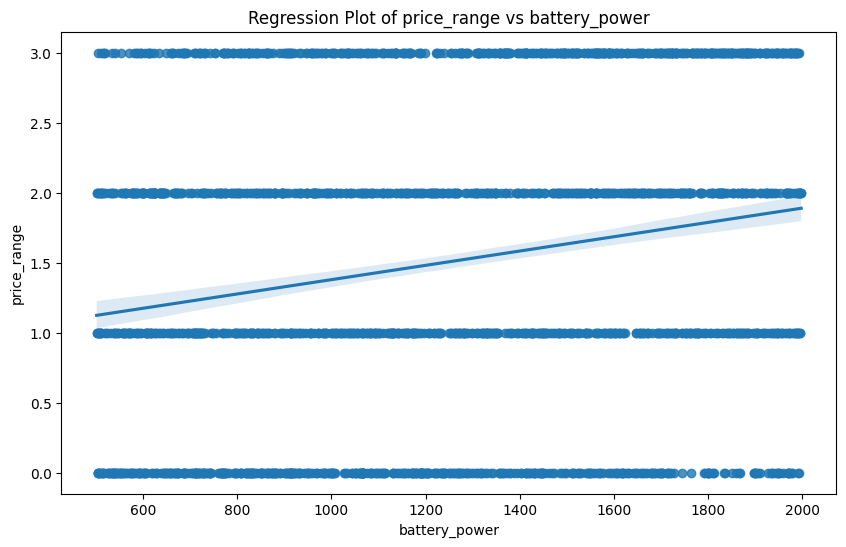

In [38]:
# next we will use a regression plot to visualize the relationship between two variables 
def create_regression_plot(df, source, target):

    try:
        plt.figure(figsize=(10, 6))
        sns.regplot(x=df[source], y=df[target])
        plt.title(f'Regression Plot of {target} vs {source}')
        plt.xlabel(source)
        plt.ylabel(target)
        plt.show()
    except Exception as e:
        print(f"Error creating the regression plot: {e}")

# Example usage 
create_regression_plot(df, 'battery_power', 'price_range')
# there seems to be a positive correlation between the two, meaning the phones with more battery power are indeed more expensive,e but realistically this is a bad representation of the data and I wouldn't want to try to draw conclusions from this plot. 

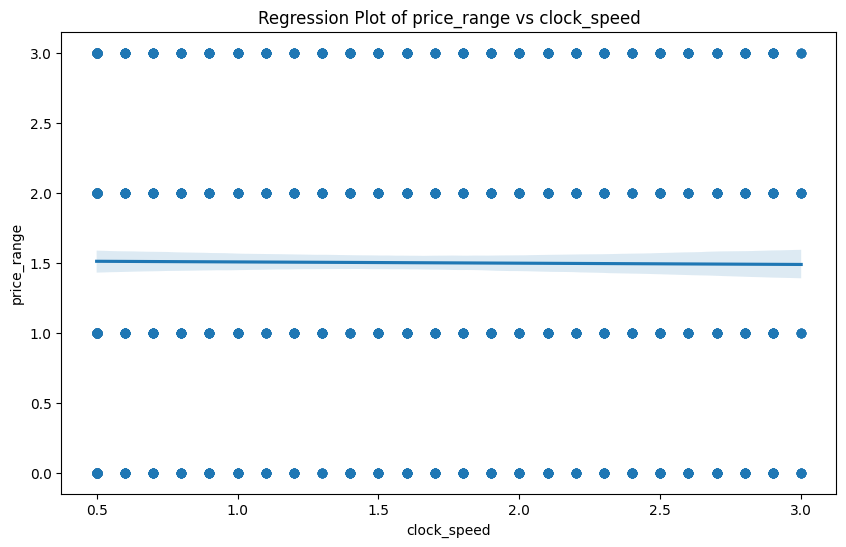

In [40]:
create_regression_plot(df, 'clock_speed', 'price_range')

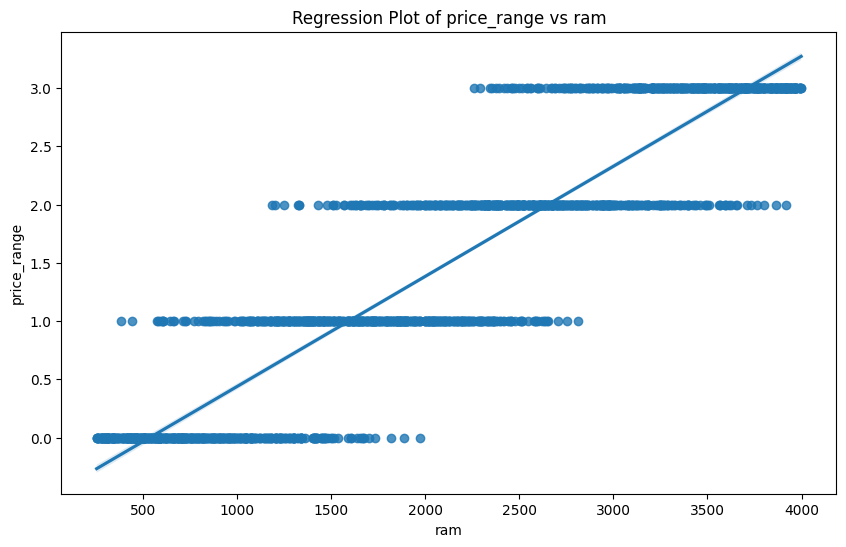

In [47]:
create_regression_plot(df, 'ram', 'price_range')

### Regression

Normally using the insights from the previous visualizations we would now move on to regression modles to create a prediction tool were we use difffernt variables to pridict the priceof a phone in this case.

In [45]:
def fit_linear_regression(df, source, target):
    try:
        X = df[[source]].values
        y = df[target].values
        
        model = LinearRegression()
        model.fit(X, y)
        
        y_pred = model.predict(X)
        
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        
        print(f"R^2 Score: {r2}")
        print(f"Mean Squared Error: {mse}")
        
        return model
    except Exception as e:
        print(f"Error fitting the linear regression model: {e}")

# Example usage 
fit_linear_regression(df, 'battery_power', 'price_range')

R^2 Score: 0.04028956701375919
Mean Squared Error: 1.199638041232801


LinearRegression()

### The Rsqrd and Mean squared error in this regression indicate that batery power is a bad predictor of a phone's price range

In [46]:
fit_linear_regression(df, 'ram', 'price_range')

R^2 Score: 0.8409728824017988
Mean Squared Error: 0.19878389699775148


LinearRegression()

### Ram seems to be a good predictor of price range

In [48]:
# multiple linear regression allows us to check the predition power of multiple factors at once
def fit_linear_regression(df, sources, target):
 
    try:
        X = df[sources].values
        y = df[target].values
        
        model = LinearRegression()
        model.fit(X, y)
        
        y_pred = model.predict(X)
        
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        
        print(f"R^2 Score: {r2}")
        print(f"Mean Squared Error: {mse}")
        
        return model
    except Exception as e:
        print(f"Error fitting the linear regression model: {e}")

# Example usage 
fit_linear_regression(df, ['ram', 'px_width','px_height'], 'price_range')

R^2 Score: 0.8769578345931407
Mean Squared Error: 0.15380270675857413


LinearRegression()

In [49]:
fit_linear_regression(df, ['mobile_wt', 'm_dep','int_memory'], 'price_range')

R^2 Score: 0.0028052271578217214
Mean Squared Error: 1.246493466052723


LinearRegression()

### Ram, pixel width, and pixel hight seem to be good indicators of price, but mobile weight, mobile depth, and internal memeory are not.

In [50]:
#polynomial regression allows for a nonlinear relationship between data points creating variance in the prediction method
def fit_polynomial_regression(df, sources, target):
    try:
        X = df[sources].values
        y = df[target].values
        
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('poly_features', PolynomialFeatures(degree=2)),
            ('regressor', LinearRegression())
        ])
        
        pipeline.fit(X, y)
        
        y_pred = pipeline.predict(X)
        
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        
        print(f"Polynomial Regression R^2 Score: {r2}")
        print(f"Polynomial Regression Mean Squared Error: {mse}")
        
        return pipeline
    except Exception as e:
        print(f"Error fitting the polynomial regression model: {e}")

# Example usage 
fit_polynomial_regression(df, ['ram', 'px_width','px_height'], 'price_range')

Polynomial Regression R^2 Score: 0.8780811760347755
Polynomial Regression Mean Squared Error: 0.15239852995653058


Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures()),
                ('regressor', LinearRegression())])

In [51]:
fit_polynomial_regression(df,['mobile_wt', 'm_dep','int_memory'], 'price_range')

Polynomial Regression R^2 Score: 0.00468188030490313
Polynomial Regression Mean Squared Error: 1.244147649618871


Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures()),
                ('regressor', LinearRegression())])

### The results seem to remain the same 

In [52]:
#finally we are going to preform some ridge regrssion
def fit_ridge_regression(df, sources, target):
    try:
        X = df[sources].values
        y = df[target].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('poly_features', PolynomialFeatures(degree=2)),
            ('ridge', Ridge())
        ])
        param_grid = {'ridge__alpha': [0.1, 1, 10, 100]}
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        print(f"Best Alpha: {grid_search.best_params_['ridge__alpha']}")
        print(f"Ridge Regression R^2 Score: {r2_score(y_test, y_pred)}")
        print(f"Ridge Regression Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
        return best_model
    except Exception as e:
        print(f"Error fitting the ridge regression model: {e}")

# Example usage 
fit_ridge_regression(df, ['ram', 'px_width','px_height'], 'price_range')


Best Alpha: 1
Ridge Regression R^2 Score: 0.886933149084088
Ridge Regression Mean Squared Error: 0.15085873916673734


Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1))])

In [53]:
fit_ridge_regression(df,['mobile_wt', 'm_dep','int_memory'], 'price_range')

Best Alpha: 100
Ridge Regression R^2 Score: -0.005155736362081775
Ridge Regression Mean Squared Error: 1.3411227590177555


Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures()),
                ('ridge', Ridge(alpha=100))])

### Ridge regression allows us to set a "penalty" value to sort of force a better prediction and grid search allowes us to find the 'penalty' value with the best output. Giving us a better Rsqrd and mean squared error value in the Ram prediction set.

# I belive this dataset was not the best option for this project however it is still possible to say that ram is an adaquate predictor of mobil phone price ranges.